## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pyLDAvis.sklearn

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier 
from sklearn.metrics import accuracy_score

from utils import make_dataset, preprocess_txt, create_corpus, create_vocab, show_most_freq_n

%reload_ext autoreload
%autoreload 2

## 2. Data Preprocessing

In [2]:
# read all datasets
df_appceleratorstudio = pd.read_csv('./data/appceleratorstudio.csv')
df_aptanastudio = pd.read_csv('./data/aptanastudio.csv')
df_bamboo = pd.read_csv('./data/bamboo.csv')
df_clover = pd.read_csv('./data/clover.csv')
df_datamanagement = pd.read_csv('./data/datamanagement.csv')
df_duracloud = pd.read_csv('./data/duracloud.csv')
df_jirasoftware = pd.read_csv('./data/jirasoftware.csv')
df_mesos = pd.read_csv('./data/mesos.csv')
df_moodle = pd.read_csv('./data/moodle.csv')
df_mule = pd.read_csv('./data/mule.csv')
df_mulestudio = pd.read_csv('./data/mulestudio.csv')
df_springxd = pd.read_csv('./data/springxd.csv')
df_talenddataquality = pd.read_csv('./data/talenddataquality.csv')
df_talendesb = pd.read_csv('./data/talendesb.csv')
df_titanium = pd.read_csv('./data/titanium.csv')
df_usergrid = pd.read_csv('./data/usergrid.csv')

In [3]:
dataset_arr = [df_appceleratorstudio,
        df_aptanastudio,
        df_bamboo,
        df_clover,
        df_datamanagement,
        df_duracloud,
        df_jirasoftware,
        df_mesos,
        df_moodle,
        df_mule,
        df_mulestudio,
        df_springxd,
        df_talenddataquality,
        df_talendesb,
        df_titanium,
        df_usergrid]

In [4]:
#get union of datasets
text, labels = make_dataset(dataset_arr)

#create corpus
corpus = create_corpus(text)
len(corpus)

20761

In [5]:
vocab = create_vocab(corpus)
len(vocab)

22458

### 3. TF-IDF


In [6]:
# tf-idf expects row text arrays as input
text_corpus = [" ".join(doc) for doc in corpus]
text_corpus[:2]

['add object literal function invocation idea metadata capture type function arg able create instance type object literal arg function invocation example',
 'update brand appcelerator plugin appcelerator logo fix feature icon associated nature screen']

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=10, use_idf=True)
tfidf_vectors = tfidf_vectorizer.fit_transform(text_corpus)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf_vectors.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,aa,abc,ability,able,abnormal,abort,absolute,abstract,abstraction,accept,...,yosemite,you,yui,zero,zindex,zip,zk,zone,zookeeper,zoom
0,0.0,0.0,0.000000,0.122052,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.22351,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


## 4. Topic Modeling : Latent Dirichlet Allocation (LDA) with TF-IDF

In [8]:
# n_components=9 based on prior knowledge about the dataset
lda_model_tf_idf = LatentDirichletAllocation(n_components=9, learning_method='online', max_iter=10, random_state=0).fit(tfidf_vectors)

### Diagnosing LDA model performance with perplexity and log-likelihood score

In [9]:
# Log Likelyhood: Higher the better
print("Log Likelihood Score: ", lda_model_tf_idf.score(tfidf_vectors))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model_tf_idf.perplexity(tfidf_vectors))

Log Likelihood Score:  -633084.6983463273
Perplexity:  4606.308536935312


### GridSearch to determine the best LDA model topic count

In [11]:
#a model with higher log-likelihood and lower perplexity is considered to be good.
search_params = {'n_components': [9, 15, 21, 27, 32]}

lda = LatentDirichletAllocation(max_iter=10, learning_method='online', learning_offset=50., random_state=0)
lda_grid = GridSearchCV(lda, param_grid=search_params)

lda_grid.fit(tfidf_vectors)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=50.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1, random_state=0,
                                                 topic_word_prior=None,
                                                 total_samples=1000000.0,
            

In [12]:
# Best Model
# Parameters
print("Best Model's Params: ", lda_grid.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", lda_grid.best_score_)
# Perplexity
best_lda_model = lda_grid.best_estimator_
print("Model Perplexity: ", best_lda_model.perplexity(tfidf_vectors))

Best Model's Params:  {'n_components': 9}
Best Log Likelihood Score:  -232478.21764689276
Model Perplexity:  4220.191811463898


### Dominant topic

In [13]:
# Create Document — Topic Matrix
lda_output = lda_model_tf_idf.transform(tfidf_vectors)
# column names
topicnames = ['Topic' + str(i) for i in range(lda_model_tf_idf.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(text_corpus))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic['label'] = labels
    
# random sample
df_document_topic.sample(n=30, random_state=42)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,dominant_topic,label
Doc14443,0.02,0.08,0.02,0.02,0.02,0.02,0.60,0.08,0.13,6,5
Doc9585,0.03,0.03,0.03,0.19,0.03,0.03,0.58,0.03,0.03,6,3
Doc14630,0.02,0.02,0.02,0.02,0.15,0.10,0.62,0.02,0.02,6,5
Doc6438,0.02,0.02,0.11,0.02,0.02,0.02,0.63,0.14,0.02,6,1
Doc16556,0.02,0.02,0.02,0.02,0.02,0.02,0.78,0.05,0.02,6,8
Doc14458,0.02,0.02,0.14,0.02,0.16,0.09,0.40,0.02,0.11,6,8
Doc9539,0.03,0.03,0.03,0.03,0.03,0.03,0.57,0.13,0.15,6,1
Doc2937,0.03,0.02,0.02,0.02,0.02,0.02,0.60,0.26,0.04,6,5
Doc14918,0.03,0.03,0.03,0.10,0.03,0.11,0.63,0.03,0.03,6,1
Doc20308,0.02,0.02,0.02,0.02,0.02,0.14,0.65,0.02,0.07,6,3


In [14]:
# Get the top 15 keywords each topic
def show_topics(vectorizer, lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tfidf_vectorizer, lda_model=lda_model_tf_idf, n_words=7)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6
Topic 0,babili,route,sam,date,bump,gemfire,svn
Topic 1,consumer,boot,driver,locator,camel,liveview,embed
Topic 2,hdfs,coverage,epic,meeting,junit,lsst,hsc
Topic 3,kafka,spike,chart,scheduler,authorization,counter,ssl
Topic 4,http,test,upgrade,plan,spring,fix,xd
Topic 5,endpoint,translation,bean,quota,partition,token,gradle
Topic 6,create,error,module,add,code,file,test
Topic 7,var,code,window,function,export,title,line
Topic 8,container,implement,acceptance,agent,documentation,docker,schema


In [15]:
pyLDAvis.enable_notebook()
panel2 = pyLDAvis.sklearn.prepare(lda_model_tf_idf, tfidf_vectors, tfidf_vectorizer, mds='tsne')
panel2

/home/student/.local/lib/python3.5/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
6      63.203685        1       1 -104.917397 -160.887222
7       9.067903        1       2   47.901031  152.201401
4       5.445261        1       3  132.938522  -84.027122
8       4.744202        1       4  -91.428032  103.010590
2       4.012157        1       5   48.821266 -196.141235
5       3.561509        1       6   -5.541216  -80.291458
3       3.421043        1       7 -131.736343  -23.272871
1       3.279649        1       8  151.903854   47.189075
0       3.264591        1       9   19.541401   28.443687, topic_info=     Category        Freq           Term       Total  loglift  logprob
3106  Default  426.000000           test  426.000000  30.0000  30.0000
528   Default  476.000000           code  476.000000  29.0000  29.0000
1003  Default  180.000000       endpoint  180.000000  28.0000  28.0000
1463  Default  222.000000      implement  222.000000  27.0000  27.0000
642   Default  184.000000      container  184.000000  26.0000  26.0000
250   Default  131.000000         babili  131.000000  25.0000  25.0000
2659  Default  130.000000          route  130.000000  24.0000  24.0000
3345  Default  187.000000            var  187.000000  23.0000  23.0000
3306  Default  269.000000         update  269.000000  22.0000  22.0000
3427  Default  248.000000         window  248.000000  21.0000  21.0000
1423  Default  156.000000           http  156.000000  20.0000  20.0000
1190  Default  192.000000            fix  192.000000  19.0000  19.0000
3457  Default  165.000000             xd  165.000000  18.0000  18.0000
3309  Default  140.000000        upgrade  140.000000  17.0000  17.0000
2903  Default  144.000000         spring  144.000000  16.0000  16.0000
367   Default  294.000000          build  294.000000  15.0000  15.0000
920   Default  131.000000  documentation  131.000000  14.0000  14.0000
3360  Default  242.000000        version  242.000000  13.0000  13.0000
2541  Default  128.000000        release  128.000000  12.0000  12.0000
638   Default   89.000000       consumer   89.000000  11.0000  11.0000
1654  Default   89.000000          kafka   89.000000  10.0000  10.0000
1374  Default   92.000000           hdfs   92.000000   9.0000   9.0000
2678  Default   85.000000            sam   85.000000   8.0000   8.0000
1258  Default  149.000000       function  149.000000   7.0000   7.0000
751   Default   90.000000           date   90.000000   6.0000   6.0000
2248  Default   97.000000           plan   97.000000   5.0000   5.0000
328   Default   80.000000           boot   80.000000   4.0000   4.0000
2191  Default  112.000000           pass  112.000000   3.0000   3.0000
3028  Default  307.000000        support  307.000000   2.0000   2.0000
3244  Default  120.000000             ui  120.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
1278   Topic9   46.911088        gemfire   48.154420   3.3959  -3.9557
3038   Topic9   44.534499            svn   45.777782   3.3945  -4.0076
3135   Topic9   42.868489  tiapplication   44.111608   3.3934  -4.0458
2665   Topic9   40.242724          ruble   41.485904   3.3916  -4.1090
3187   Topic9   36.743631       transfer   37.987693   3.3887  -4.1999
1118   Topic9   31.026286    externalize   32.269372   3.3828  -4.3691
754    Topic9   30.834202            day   32.078575   3.3825  -4.3753
1805   Topic9   30.021010           mail   31.264628   3.3814  -4.4020
2660   Topic9   26.114270         router   27.357831   3.3755  -4.5414
909    Topic9   25.814674         distro   27.057950   3.3750  -4.5530
391    Topic9   24.748943       calendar   25.992100   3.3730  -4.5951
3223   Topic9   24.319375            tuj   25.562458   3.3722  -4.6126
1963   Topic9   23.949268           mqtt   25.192402   3.3714  -4.6280
2267   Topic9   21.553617           pojo   22.796893   3.3660  -4.7334
253    Topic9   21.555388        backend   22.805046 

# 5. Classification and prediction

In [16]:
features_train, features_test, labels_train, labels_test = train_test_split(tfidf_vectors, labels, test_size=0.3, random_state=111)

In [17]:
svc = LinearSVC(multi_class='crammer_singer')
knc = KNeighborsClassifier(n_neighbors=50)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='lbfgs', penalty='l2', multi_class='multinomial', max_iter=10000)
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [18]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [19]:
def train_clf(clf, train_x, train_y):
    clf.fit(train_x, train_y)

In [20]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [21]:
pred_scores = []
for k,v in clfs.items():
    train_clf(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
df = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score'])
df.sort_values(by=['Score'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
AdaBoost,0.249318
DT,0.273559
KN,0.307272
SVC,0.307594
BgC,0.310323
ETC,0.318510
LR,0.322203
NB,0.327500
RF,0.327821


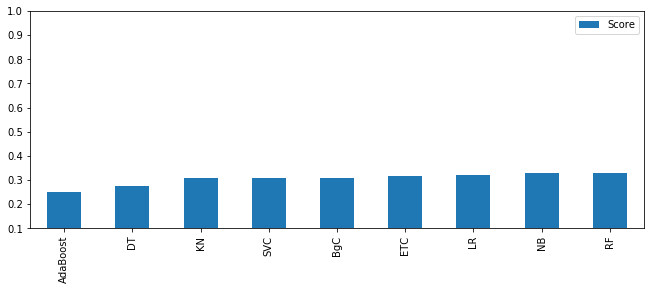

In [23]:
df.sort_values(by=['Score']).plot(kind='bar', figsize=(11,4), ylim=(0.1,1.0));

### Comparing Freq features method vs TF-IDF

In [24]:
# from previous method
freq_pred_scores_sorted = [('AdaBoost', [0.26360571520308235]),
 ('BgC', [0.26328463637823085]),
 ('DT', [0.23759833039011077]),
 ('ETC', [0.26360571520308235]),
 ('KN', [0.28704446941724193]),
 ('LR', [0.2939476641515492]),
 ('NB', [0.23743779097768503]),
 ('RF', [0.2814255899823407]),
 ('SVC', [0.029378712473912345])]

In [25]:
tf_idf_scores_sorted = sorted(pred_scores, key=lambda x: x[0])
tf_idf_df = pd.DataFrame.from_items(tf_idf_scores_sorted, orient='index', columns=['TF-IDF'])
tf_idf_df

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,TF-IDF
AdaBoost,0.249318
BgC,0.310323
DT,0.273559
ETC,0.318510
KN,0.307272
LR,0.322203
NB,0.327500
RF,0.327821
SVC,0.307594


In [26]:
fre_df = pd.DataFrame.from_items(freq_pred_scores_sorted, orient='index', columns=['Freq'])
fre_df

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Freq
AdaBoost,0.263606
BgC,0.263285
DT,0.237598
ETC,0.263606
KN,0.287044
LR,0.293948
NB,0.237438
RF,0.281426
SVC,0.029379


In [27]:
df_compare = pd.DataFrame.join(tf_idf_df, fre_df)
df_compare

,TF-IDF,Freq
AdaBoost,0.249318,0.263606
BgC,0.310323,0.263285
DT,0.273559,0.237598
ETC,0.318510,0.263606
KN,0.307272,0.287044
LR,0.322203,0.293948
NB,0.327500,0.237438
RF,0.327821,0.281426
SVC,0.307594,0.029379


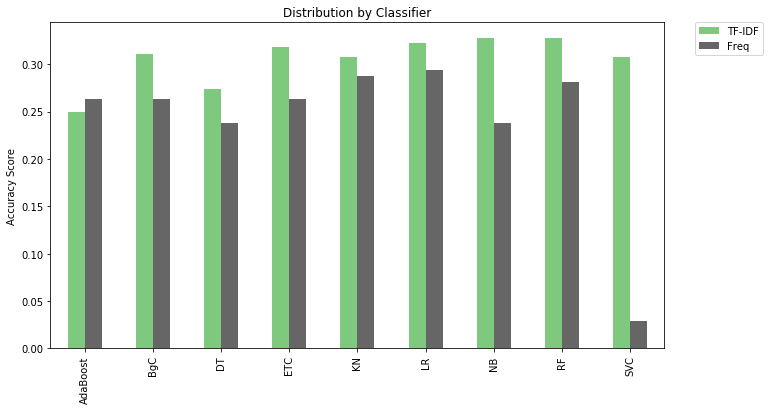

In [30]:
df_compare.plot(kind='bar', figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df_compare.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);